# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pkg.constants    import *
from pkg.evaluation   import Evaluation
from pkg.utils        import *

# Objeto evaluación

In [2]:
ev = Evaluation()

# Funciones necesarias

## Generación población inicial

En cada población añadimos 3 cromosomas conocidos con buenas heurísticas, calculados previamente con otros algoritmos (práctica 1)
- [16 12 19 17 20 13 12 11 10 13 14 24  2  2 22 13] -> 375.7658566586277
- [16 12 20 18 20 13 12 11  9 15 14 24  2 16  6 12] -> 378.2038511496476
- [13 12 20 21 17 14 14  8 11  8 17 24  3 11 14 13] -> 381.8566495953962

Estos cromosomas se han evaluado según la función coste (antigua), y no sobre la función fitness (nueva).

In [3]:
conocido1 = np.array([16, 12, 19, 17, 20, 13, 12, 11, 10, 13, 14, 24,  2,  2, 22, 13])
conocido2 = np.array([16, 12, 20, 18, 20, 13, 12, 11,  9, 15, 14, 24,  2, 16,  6, 12])
conocido3 = np.array([13, 12, 20, 21, 17, 14, 14,  8, 11,  8, 17, 24,  3, 11, 14, 13])

conocidos = np.array([conocido1, conocido2, conocido3])

In [4]:
poblacion = inicializa_poblacion(20, conocidos)
poblacion

array([[16, 12, 19, 17, 20, 13, 12, 11, 10, 13, 14, 24,  2,  2, 22, 13],
       [16, 12, 20, 18, 20, 13, 12, 11,  9, 15, 14, 24,  2, 16,  6, 12],
       [13, 12, 20, 21, 17, 14, 14,  8, 11,  8, 17, 24,  3, 11, 14, 13],
       [19, 16, 14,  5, 21,  9, 21, 12, 19,  5, 16, 16,  7, 21,  9,  9],
       [24,  6,  8,  6, 16,  8, 25, 19, 25,  8, 14,  8,  6, 25,  8, 14],
       [13, 13, 18, 15,  5, 15, 20, 15, 13, 18,  8,  8,  8, 10, 18, 23],
       [21,  9, 18, 21,  9, 18, 12, 25, 27,  9,  6,  6, 15,  6,  9,  9],
       [ 6,  6, 11, 11, 25,  8, 17, 22, 22,  6,  8,  6, 25,  8, 19, 19],
       [ 8, 22, 11, 14, 24, 11, 16,  8, 22, 19,  6,  6, 14,  8, 25,  6],
       [20, 15, 18,  8, 22,  8,  5, 22, 15, 22, 20,  8, 15,  5, 12,  5],
       [20,  9,  9, 20, 12, 21,  6, 20,  9, 23,  9, 12, 20,  9,  9, 12],
       [24,  5,  5, 10,  5,  8, 16, 16, 10, 21, 16,  5, 21, 21, 24, 13],
       [10, 10, 10, 17,  5, 19,  5, 12, 19, 12, 19, 22,  5, 17, 19, 19],
       [ 7,  5,  5, 17, 12,  7, 12, 20, 17, 10, 19,

## Evalua poblacion

In [16]:
f_poblacion, km_poblacion, slots_poblacion = evalua_poblacion(poblacion=poblacion, alpha=10, evaluation=ev)
f_poblacion, km_poblacion, slots_poblacion

(array([2575.76585666, 2578.20385115, 2581.8566496 , 2738.47398993,
        3042.45771506, 2780.2259272 , 2806.53151367, 2769.003486  ,
        2704.76783559, 2806.61484551, 2687.12851439, 2825.29966336,
        2675.36903798, 2721.86430959, 2780.74883509, 2715.71247785,
        2807.48854089, 2784.31118803, 2692.28088715, 2803.68968661]),
 array([375.76585666, 378.20385115, 381.8566496 , 538.47398993,
        872.45771506, 580.2259272 , 616.53151367, 569.003486  ,
        504.76783559, 636.61484551, 487.12851439, 635.29966336,
        475.36903798, 521.86430959, 580.74883509, 525.71247785,
        617.48854089, 584.31118803, 492.28088715, 603.68968661]),
 array([220., 220., 220., 220., 217., 220., 219., 220., 220., 217., 220.,
        219., 220., 220., 220., 219., 219., 220., 220., 220.]))

## Selección de padres

Selección aleatoria de padres. De esta forma, aquellos cromosomas con peores fitness también presentan una oportunidad de pasar su material genético.

In [6]:
padres = seleccion_padres(poblacion)
padres.shape[1]

16

## Operador de cruce

Cruce uniforme. 

A partir de 2 padres, generamos 6 hijos validos (más de 205 slots), de los cuales nos quedaremos con los 2 con menor fitness

In [7]:
hijos, fitness_hijos, km_hijos = operador_cruce(padres, ev, 10)
hijos, fitness_hijos, km_hijos

(array([[19., 24., 13.,  8., 16.,  5., 13., 19.,  8., 11.,  7., 21., 14.,
         14.,  8.,  5.],
        [16.,  7., 13.,  9., 16.,  5., 13., 19.,  8.,  8.,  7., 21., 14.,
         14., 18., 18.]]),
 array([2746.69457514, 2753.59908864]),
 array([696.69457514, 693.59908864]))

## Mutacion

Siempre se produce mutación. 

La cantidad de genes mutados dependerá de lo buena que sea la solución (mejor fitness, menores genes mutados). Cantidad de genes mutados: entre el 5 y el 20%, es decir, entre 1 y 3 genes.

Esto es una medida de intesificación de la búsqueda (si el cromosoma tiene buen fitness en comparacion con el resto de la poblacion, se pretende seguir explorando entorno en el que se encuentra).

Además, también se considera la opción de que no se mute el hijo (5%)

In [13]:
print(hijos[0,:])
print(muta_cromosoma(hijos[0,:], 2))

[19. 24. 13.  8. 16.  5. 13. 19.  8. 11.  7. 21. 14. 14.  8.  5.]
[19. 24. 13. 10. 16.  5. 13. 19.  8. 11.  7. 21. 12. 14.  8.  5.]


In [21]:
print(hijos)
print(mutacion(f_poblacion, hijos, fitness_hijos, 2 ))

[[19. 24. 13.  8. 16.  5. 13. 19.  8. 11.  7. 21. 14. 14.  8.  5.]
 [16.  7. 13.  9. 16.  5. 13. 19.  8.  8.  7. 21. 14. 14. 18. 18.]]
[[19. 24. 15.  8. 16.  5. 13. 19.  8. 11.  7. 21. 14. 14.  8.  3.]
 [16.  7. 13.  9. 16.  5. 13. 19.  8. 10.  7. 21. 14. 14. 16. 18.]]


## Reemplazo

Reemplazo por torneo. Torneo del 20% de la población. Si el número de cromosomas participantes en el torneo es menor que 3, se establece a 3.

Cambiamos el peor cromosoma de la poblacion (fitness más alto) por el mejor hijo (fitness más bajo). 

In [22]:
def reemplazo(k, poblacion, f_poblacion, hijos, f_hijos):

    k = 0.2
    participantes = int((poblacion.shape[0]*k))

    if participantes < 3:
        participantes = 3

    indices = list(range(poblacion.shape[0]))
    np.random.shuffle(indices)


    i_participantes = indices[:participantes]
    f_participantes = f_poblacion[i_participantes]

  

    # sustituimos el peor de los participantes
    peor_participantes = np.argmax(f_participantes)
    i_peor_poblacion = i_participantes[peor_participantes]

    # por el mejor de los hijos
    i_mejor_hijo = np.argmin(f_hijos)

    mejor_hijo         = hijos[i_mejor_hijo]
    mejor_hijo_fitness = f_hijos[i_mejor_hijo]
    

    
    f_poblacion[i_peor_poblacion] = mejor_hijo_fitness
    poblacion[i_peor_poblacion,:] = mejor_hijo.copy()

    return poblacion, f_poblacion

# Algoritmo Genético Básico (Estacionario)

Durante cada iteración, se escogen 2 padres de la población y se les aplica los operadores genéticos.

El/los descendientes reemplazan a o varios cromosoma/s de la población anterior.

Presión selectiva alta (enfoque está muy dirigido a reproducir los mejores individuos y eliminar los peores de la población). Produce una convergencia rápida cuando se reemplazan los peores cromosomas de la población.

Se ha escogido un algoritmo genético estacionario para poder introducir distintas técnicas de diversidad (respecto al cruce y a la mutación) para controlar la presión selectiva y, consecuentemente, la convergencia prematura, con distintas técnicas.

Además, usar el modelo estacionario permite realizar menos evaluaciones por iteración, lo que nos permitirá hacer más iteraciones antes de que se de el criterio de parada.

## Criterio de parada

Dos criterios de parada:
- Número máximo de evaluaciones (que la ejecución no supere la media hora).
- Mejor fitness no varía en varias iteraciones.

Tiempo medio de una evaluación: 0.05094067573547363 segundos.

In [6]:
(30*60)/0.05094067573547363

35335.22031288115

Número máximo de evaluaciones por ejecución, para la ejecución final: 35000.

Para el ajuste de parámetros, usaremos un número reducido de evaluaciones máximas: 20000.



## Ajuste de parámetros

El ajuste de parámetros se hará con una sola semilla. Una vez ajustados, se procederá a lanzar el algoritmo con distintas semillas, con el objetivo de sacar estadísticos de los resultados.

In [23]:
seed = 4052022
np.random.seed(seed)

Parámetros a ajustar:
- Valor alpha del fitness (ajustado)
- Tamaño de la población
- Probabilidad de mutación
- Técnica de reemplazo.


### Ajuste de Alpha para el fitness

Podemos ajustar el valor de alpha mediante el operador de cruce, asegurandonos que los hijos que se obtengan esten dentro de un rango [205,220], pudiendo admitir valores un poco superiores al límite superior.

In [10]:
alphas = [10, 12.5, 15, 17.5, 20, 22.5]

np.random.seed(seed)

slots = []
medias = []
std = []

for alpha in alphas:

    print(alpha)

    for i in range(100):
        hijos, fitness = operador_cruce(padres,ev,alpha)

        for hijo in hijos:
            slots = np.append(slots, hijo.sum())
    

    medias = np.append(medias, np.mean(slots))
    std    = np.append(std, np.std(slots))
    
    slots = []

print(f'medias: {medias}')
print(f'desviaciones tipicas: {std}')


10
12.5
15
17.5
20
22.5
medias: [220.53  216.755 216.625 215.82  215.195 214.92 ]
desviaciones tipicas: [9.38025053 8.19359353 7.99527204 7.70503731 7.55956183 7.21828234]


Observamos que conforme aumenta el alpha, el número medio de slots que se obtiene disminuye. Nos quedamos con **alpha = 20** porque los slots de los hijos generados se encuentran en el rango [205, 215.195 + 7.21828234] -> [205, 222.41328234], siendo 222 un número de slots muy cercano al deseado (220)

In [8]:
# Posibles tamaños de la poblacion
tam_poblacion = np.array([18,22,26,30])

Medidas estadísticas estudiadas para el ajuste de parámetros, por cada iteración:
- Media del fitness de la población.
- Varianza del fitness de la población.
- Mejor fitness de la población
- Numero medio de estaciones


In [35]:
def agb_estacionario(poblacion, alpha, evaluation, grafica, path = None):

    ev.total_calls = 0

    t = 0

    # estadisticos 
    media_fitness    = []
    var_fitness      = []
    mejor_fitness    = []


    fitness_poblacion, km_poblacion, slots_poblacion = evalua_poblacion(
        poblacion = poblacion,
        alpha = alpha,
        evaluation= evaluation)

    varianza = np.var(fitness_poblacion)
    
    # actualizacion estadisticos
    media_fitness = np.append(media_fitness, np.mean(fitness_poblacion))
    var_fitness   = np.append(var_fitness, np.var(fitness_poblacion))
    mejor_fitness = np.append(mejor_fitness, np.min(fitness_poblacion))



    while evaluation.total_calls < 10000:
        t += 1
        
        padres = seleccion_padres(poblacion)
        hijos, fitness_hijos, km_hijos = operador_cruce(padres, evaluation, alpha)

        hijos = mutacion(\
            fitness_poblacion, hijos, fitness_hijos, granularidad=2)
        
        fitness_hijos, km_h, s_h = evalua_poblacion(hijos, evaluation, alpha)
        

        poblacion, fitness_poblacion = reemplazo(0.2, poblacion,fitness_poblacion, hijos, fitness_hijos)

        varianza = np.var(fitness_poblacion)
        print(f'varianza: {varianza}')

        if varianza < 5:
            break
        

        # actualizacion estadisticos
        media_fitness = np.append(media_fitness, np.mean(fitness_poblacion))
        var_fitness   = np.append(var_fitness, np.var(fitness_poblacion))
        mejor_fitness = np.append(mejor_fitness, np.min(fitness_poblacion))

        print(ev.total_calls)
        
     
    
    if grafica is True:
        # REPRESENTACION GRAFICA DE LOS RESULTADOS
        x = list(range(len(media_fitness)))
        
        fig, (media_f, var, mejor) = plt.subplots(3, 1)

        media_f.plot(x, media_fitness, color='C1')
        media_f.set_ylabel('Media fitness')

        var.plot(x,var_fitness, color='C2')
        var.set_ylabel('Varianza fitness')

        mejor.plot(x,mejor_fitness, color='C0')
        mejor.set_ylabel('Mejor fitness')
        mejor.set_xlabel('epocas')


    if path is not None:
        print('guarda datos')

    
    i_mejor_fitness = np.argmin(fitness_poblacion)

    mejor_fitness = fitness_poblacion[i_mejor_fitness]
    mejor_cromosoma = poblacion[i_mejor_fitness,:].copy()

    return mejor_cromosoma, mejor_fitness

varianza: 8070.213548326969
28
varianza: 7276.94826544008
36
varianza: 6965.540785822074
44
varianza: 5164.489375521176
52
varianza: 2753.738606553112
60
varianza: 2955.1337585431656
68
varianza: 2758.68527466956
76
varianza: 2607.5437587333586
84
varianza: 2769.7540134568867
92
varianza: 2745.981579479514
100
varianza: 2789.8492407384747
108
varianza: 2799.9379744100193
116
varianza: 2045.304483334336
124
varianza: 1841.4452097281815
132
varianza: 1628.3899219874506
140
varianza: 1575.171455240453
148
varianza: 1462.8463598923408
156
varianza: 1399.2839438752248
164
varianza: 1425.189684740381
172
varianza: 1130.3491744267092
180
varianza: 1020.1441422767168
188
varianza: 956.9338462497781
196
varianza: 925.8429330543165
204
varianza: 836.5805787305511
212
varianza: 831.5686545762455
220
varianza: 805.5632609300206
228
varianza: 800.8313274897447
236
varianza: 799.4487454519628
244
varianza: 910.5315209670732
252
varianza: 917.1568857852011
260
varianza: 838.6030914848449
268
varianza

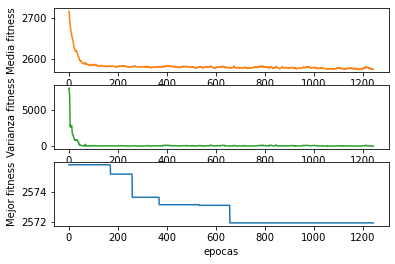

In [39]:
poblacion = inicializa_poblacion(20,conocidos)
crom, fit= agb_estacionario(poblacion, 10,ev,True)

In [40]:
crom, fit

(array([18, 12, 19, 17, 20, 13, 12, 11, 13, 13, 14, 24,  2,  2, 22, 11],
       dtype=int64),
 2571.9481275484573)

In [41]:
ev.fitness(crom, 10)

(2571.9481275484573, 341.94812754845714, 223)

Text(0.5, 0, 'epocas')

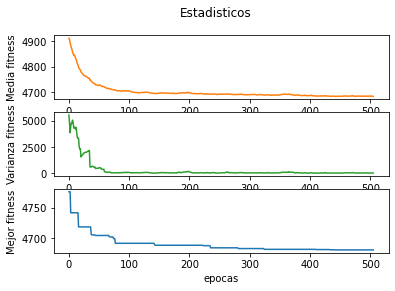

In [33]:
fig, (media_f, var, mejor) = plt.subplots(3, 1)

fig.suptitle('Estadisticos')
fig.align_ylabels

media_f.plot(list(range(len(a))), a, color='C1')
media_f.set_ylabel('Media fitness')

var.plot(list(range(len(b))),b, color='C2')
var.set_ylabel('Varianza fitness')

mejor.plot(list(range(len(c))),c, color='C0')
mejor.set_ylabel('Mejor fitness')
mejor.set_xlabel('epocas')

In [18]:
p,f

(array([[16, 12, 20, 17, 19, 13, 12,  9, 12, 13, 10, 16,  3, 11, 12, 10],
        [16, 12, 22, 15, 19, 13, 12,  9, 12, 13, 10, 16,  3,  7, 16, 10],
        [16, 12, 22, 15, 19, 13, 12,  9, 12, 13, 10, 18,  3,  7, 16,  8],
        [14, 12, 22, 15, 19, 13, 12,  9, 12, 11, 14, 16,  3,  7, 16, 10],
        [15, 12, 20, 18, 19, 13, 12,  5, 12, 13, 14, 16,  3, 11, 12, 10],
        [16, 12, 20, 17, 19, 13, 12,  7, 12,  9, 12, 16,  3, 13, 14, 10],
        [16, 12, 22, 15, 19, 13, 12,  9, 12, 13, 10, 14,  3, 13, 12, 10],
        [16, 12, 20, 17, 19, 13, 12, 11, 10, 13, 10, 16,  3,  7, 16, 10],
        [16, 12, 20, 17, 19, 13, 12,  9, 10, 15, 10, 16,  3, 11, 12, 10],
        [14, 12, 20, 19, 17, 13, 12,  9, 12, 13, 12, 16,  3,  7, 16, 10],
        [16, 12, 20, 17, 19, 13, 12,  9, 10, 15, 10, 16,  3, 11, 12, 10],
        [14, 12, 20, 17, 19, 13, 12,  9, 12, 13, 12, 16,  3, 11, 12, 10],
        [14, 12, 22, 17, 17, 13, 14,  9, 12, 11, 10, 16,  3, 11, 14, 10],
        [16, 12, 18, 17, 19, 13, 12,  

In [ ]:
ev.total_calls = 0

Text(0.5, 0, 'Iterations')

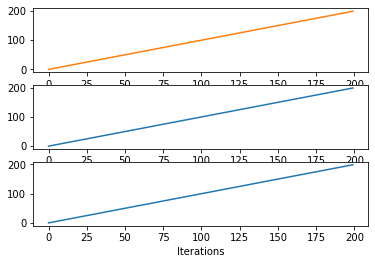

In [24]:
y = list(range(200))
x = list(range(len(y)))

fig, (g1,g2,g3) = plt.subplots(3, 1)
g1.plot(x,y, color='C1')
g2.plot(x,y, color='C0')
g2.set_xlabel('Iterations')

g3.plot(x,y, color='C0')
g3.set_xlabel('Iterations')


